##Problem 3

###Preparation:

In [ ]:
install.packages(c("xts", "quantmod", "vars", "neuralnet", "kernlab", "TTR", "lubridate", "caret", "tseries", "keras", "tensorflow"))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library("TTR")
library("lubridate")
library("neuralnet")
library("kernlab")
library("caret")
library("tseries")
library("keras")
library("tensorflow")

In [ ]:
library("xts"); library("quantmod");library("vars");

In [ ]:
GYm<-read.csv('goyal-welch2022Monthly.csv',sep=',',header=TRUE)
str(GYm)

'data.frame':	1824 obs. of  18 variables:
 $ yyyymm    : int  187101 187102 187103 187104 187105 187106 187107 187108 187109 187110 ...
 $ Index     : chr  "4.44" "4.50" "4.61" "4.74" ...
 $ D12       : num  0.26 0.26 0.26 0.26 0.26 0.26 0.26 0.26 0.26 0.26 ...
 $ E12       : num  0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 ...
 $ b.m       : num  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN ...
 $ tbl       : num  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN ...
 $ AAA       : num  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN ...
 $ BAA       : num  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN ...
 $ lty       : num  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN ...
 $ ntis      : num  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN ...
 $ Rfree     : num  NaN 0.00497 0.00453 0.00425 0.00464 ...
 $ infl      : num  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN ...
 $ ltr       : num  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN ...
 $ corpr     : num  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN ...
 $ svar      : num  NaN NaN NaN NaN Na

In [ ]:
head(GYm)

,yyyymm,Index,D12,E12,b.m,tbl,AAA,BAA,lty,ntis,Rfree,infl,ltr,corpr,svar,csp,CRSP_SPvw,CRSP_SPvwx
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,187101,4.44,0.26,0.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,187102,4.50,0.26,0.4,NaN,NaN,NaN,NaN,NaN,NaN,0.004967,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,187103,4.61,0.26,0.4,NaN,NaN,NaN,NaN,NaN,NaN,0.004525,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,187104,4.74,0.26,0.4,NaN,NaN,NaN,NaN,NaN,NaN,0.004252,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,187105,4.86,0.26,0.4,NaN,NaN,NaN,NaN,NaN,NaN,0.004643,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,187106,4.82,0.26,0.4,NaN,NaN,NaN,NaN,NaN,NaN,0.003698,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
##Index is char must change to numeric
GYm$Index = as.numeric(GYm$Index)
#2. convert yyyymm to Date format
GYm$yyyymm <-ym(GYm$yyyymm) ##ym()
##note GYm$yyyymm is char and to convert to xts cannot be part of data or else make all char (as xts can only be of one type)
GYm <- as.xts(GYm[-1],order.by = GYm$yyyymm)
head(GYm)

Warning message:
“NAs introduced by coercion”


           Index  D12 E12 b.m tbl AAA BAA lty ntis    Rfree infl ltr corpr svar
1871-01-01  4.44 0.26 0.4 NaN NaN NaN NaN NaN  NaN      NaN  NaN NaN   NaN  NaN
1871-02-01  4.50 0.26 0.4 NaN NaN NaN NaN NaN  NaN 0.004967  NaN NaN   NaN  NaN
1871-03-01  4.61 0.26 0.4 NaN NaN NaN NaN NaN  NaN 0.004525  NaN NaN   NaN  NaN
1871-04-01  4.74 0.26 0.4 NaN NaN NaN NaN NaN  NaN 0.004252  NaN NaN   NaN  NaN
1871-05-01  4.86 0.26 0.4 NaN NaN NaN NaN NaN  NaN 0.004643  NaN NaN   NaN  NaN
1871-06-01  4.82 0.26 0.4 NaN NaN NaN NaN NaN  NaN 0.003698  NaN NaN   NaN  NaN
           csp CRSP_SPvw CRSP_SPvwx
1871-01-01 NaN       NaN        NaN
1871-02-01 NaN       NaN        NaN
1871-03-01 NaN       NaN        NaN
1871-04-01 NaN       NaN        NaN
1871-05-01 NaN       NaN        NaN
1871-06-01 NaN       NaN        NaN

In [ ]:
mt=GYm['1927/2021']

head(mt)

           Index    D12   E12       b.m    tbl    AAA    BAA    lty       ntis
1927-01-01 13.21 0.6967 1.229 0.4437056 0.0323 0.0466 0.0561 0.0351 0.05082378
1927-02-01 13.84 0.7033 1.218 0.4285009 0.0329 0.0467 0.0559 0.0347 0.05166764
1927-03-01 13.93 0.7100 1.208 0.4697651 0.0320 0.0462 0.0554 0.0331 0.04635658
1927-04-01 14.17 0.7167 1.197 0.4567541 0.0339 0.0458 0.0548 0.0333 0.05051402
1927-05-01 14.91 0.7233 1.186 0.4347826 0.0333 0.0457 0.0550 0.0327 0.05527539
1927-06-01 14.77 0.7300 1.175 0.4523852 0.0307 0.0458 0.0555 0.0334 0.05882192
            Rfree         infl     ltr   corpr         svar csp CRSP_SPvw
1927-01-01 0.0025 -0.011299435  0.0075  0.0056 0.0004698947 NaN -0.002910
1927-02-01 0.0026 -0.005714286  0.0088  0.0069 0.0002873343 NaN  0.045522
1927-03-01 0.0030 -0.005747126  0.0253  0.0083 0.0009241928 NaN  0.007324
1927-04-01 0.0025  0.000000000 -0.0005  0.0055 0.0006025886 NaN  0.013021
1927-05-01 0.0030  0.005780347  0.0109 -0.0011 0.0003917338 NaN  0.062353
192

In [ ]:
# The features we are allowed to work with are de, ep and tbl

# de - dividend payout ratio  (D12 / E12  =  Dividend / Earnings)
# ep - earning to price ratio (E12 / Index = Earnings / Price)
# tbl - treasury bill rate

In [ ]:
#compute target - log returns of S&P500

logret =diff(log(mt$Index))

In [ ]:
# dividend-payout ratio (de)
de <- log(mt$D12) - log(mt$E12)

# earnings to price
ep <- log(mt$E12) - log(mt$Index)

# Treasury Bill rates (tbl, 1920)
tbl <- mt$tbl

In [ ]:
names(logret) = "logret";
names(de) = "de";
names(ep) = "ep";
names(tbl) = "tbl";

In [ ]:
#dataset <- na.omit(merge(logret, de, ep, tbl))
dataset <- merge(logret, de, ep, tbl)

In [ ]:
head(dataset)

summary(dataset)

                 logret         de        ep    tbl
1927-01-01           NA -0.5676012 -2.374773 0.0323
1927-02-01  0.046588832 -0.5491819 -2.430353 0.0329
1927-03-01  0.006481838 -0.5314564 -2.445079 0.0320
1927-04-01  0.017082266 -0.5129164 -2.471309 0.0339
1927-05-01  0.050905075 -0.4945175 -2.531446 0.0333
1927-06-01 -0.009434032 -0.4759789 -2.531330 0.0307

     Index                logret                de                ep        
 Min.   :1927-01-01   Min.   :-0.355851   Min.   :-1.2442   Min.   :-4.836  
 1st Qu.:1950-09-23   1st Qu.:-0.020218   1st Qu.:-0.8666   1st Qu.:-2.891  
 Median :1974-06-16   Median : 0.009049   Median :-0.6329   Median :-2.697  
 Mean   :1974-06-16   Mean   : 0.004950   Mean   :-0.6432   Mean   :-2.650  
 3rd Qu.:1998-03-08   3rd Qu.: 0.036285   3rd Qu.:-0.5015   3rd Qu.:-2.374  
 Max.   :2021-12-01   Max.   : 0.352221   Max.   : 1.3795   Max.   :-1.775  
                      NA's   :266                           NA's   :261     
      tbl         
 Min.   :0.00010  
 1st Qu.:0.00380  
 Median :0.02790  
 Mean   :0.03307  
 3rd Qu.:0.05090  
 Max.   :0.16300  
                  

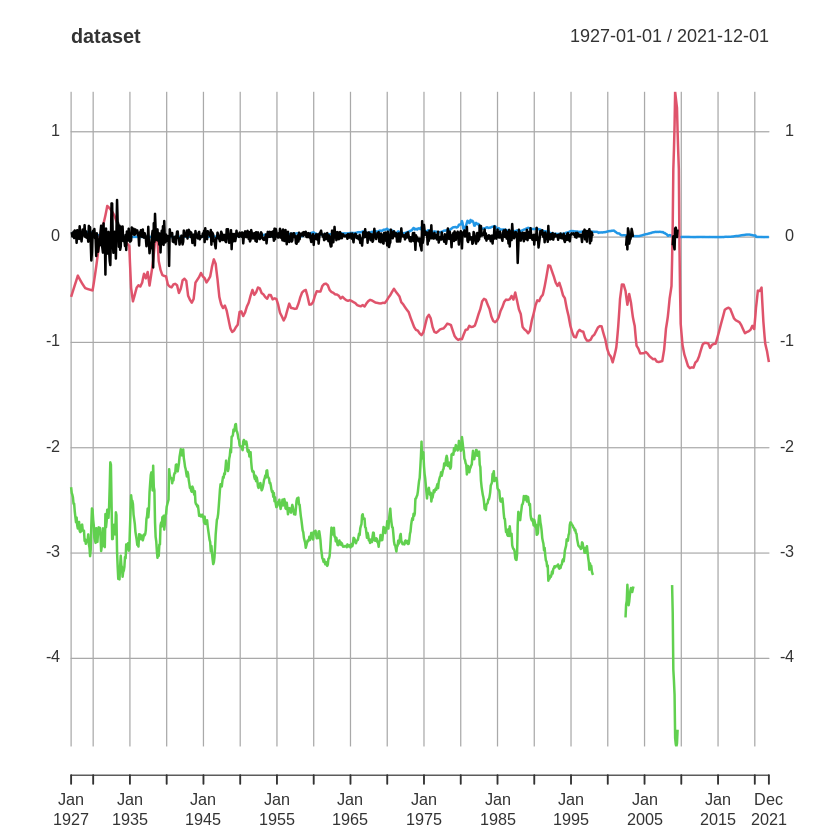

In [ ]:
plot(dataset)

In [ ]:
# Create lags
lagged_dataset <- merge(
  dataset,
  lag.xts(dataset$de, 1), lag.xts(dataset$de, 2), lag.xts(dataset$de, 3),
  lag.xts(dataset$de, 4), lag.xts(dataset$de, 5), lag.xts(dataset$de, 6),
  lag.xts(dataset$de, 7), lag.xts(dataset$de, 8), lag.xts(dataset$de, 9),
  lag.xts(dataset$de, 10), lag.xts(dataset$de, 11), lag.xts(dataset$de, 12),
  lag.xts(dataset$ep, 1), lag.xts(dataset$ep, 2), lag.xts(dataset$ep, 3),
  lag.xts(dataset$ep, 4), lag.xts(dataset$ep, 5), lag.xts(dataset$ep, 6),
  lag.xts(dataset$ep, 7), lag.xts(dataset$ep, 8), lag.xts(dataset$ep, 9),
  lag.xts(dataset$ep, 10), lag.xts(dataset$ep, 11), lag.xts(dataset$ep, 12),
  lag.xts(dataset$tbl, 1), lag.xts(dataset$tbl, 2), lag.xts(dataset$tbl, 3),
  lag.xts(dataset$tbl, 4), lag.xts(dataset$tbl, 5), lag.xts(dataset$tbl, 6),
  lag.xts(dataset$tbl, 7), lag.xts(dataset$tbl, 8), lag.xts(dataset$tbl, 9),
  lag.xts(dataset$tbl, 10), lag.xts(dataset$tbl, 11), lag.xts(dataset$tbl, 12),
  lag.xts(dataset$logret, 1), lag.xts(dataset$logret, 2), lag.xts(dataset$logret, 3),
  lag.xts(dataset$logret, 4), lag.xts(dataset$logret, 5), lag.xts(dataset$logret, 6),
  lag.xts(dataset$logret, 7), lag.xts(dataset$logret, 8), lag.xts(dataset$logret, 9),
  lag.xts(dataset$logret, 10), lag.xts(dataset$logret, 11), lag.xts(dataset$logret, 12),
  all = FALSE
)

colnames(lagged_dataset) <- c("logret", "de", "ep", "tbl",
                              "de_lag1", "de_lag2", "de_lag3",
                              "de_lag4", "de_lag5", "de_lag6",
                              "de_lag7", "de_lag8", "de_lag9",
                              "de_lag10", "de_lag11", "de_lag12",
                              "ep_lag1", "ep_lag2", "ep_lag3",
                              "ep_lag4", "ep_lag5", "ep_lag6",
                              "ep_lag7", "ep_lag8", "ep_lag9",
                              "ep_lag10", "ep_lag11", "ep_lag12",
                              "tbl_lag1", "tbl_lag2", "tbl_lag3",
                              "tbl_lag4", "tbl_lag5", "tbl_lag6",
                              "tbl_lag7", "tbl_lag8", "tbl_lag9",
                              "tbl_lag10", "tbl_lag11", "tbl_lag12",
                              "logret_lag1", "logret_lag2", "logret_lag3",
                              "logret_lag4", "logret_lag5", "logret_lag6",
                              "logret_lag7", "logret_lag8", "logret_lag9",
                              "logret_lag10", "logret_lag11", "logret_lag12")



In [ ]:
lagged_dataset <- na.omit(lagged_dataset)
head(lagged_dataset)

                logret         de        ep    tbl    de_lag1    de_lag2
1928-02-01 -0.01780122 -0.3883399 -2.704291 0.0333 -0.3775701 -0.3657248
1928-03-01  0.10286610 -0.3986912 -2.788289 0.0327 -0.3883399 -0.3775701
1928-04-01  0.03189571 -0.4095986 -2.800832 0.0362 -0.3986912 -0.3883399
1928-05-01  0.01257878 -0.4195159 -2.795243 0.0390 -0.4095986 -0.3986912
1928-06-01 -0.04134296 -0.4298566 -2.735254 0.0392 -0.4195159 -0.4095986
1928-07-01  0.01242895 -0.4399243 -2.729377 0.0412 -0.4298566 -0.4195159
              de_lag3    de_lag4    de_lag5    de_lag6    de_lag7    de_lag8
1928-02-01 -0.3843253 -0.4027744 -0.4213385 -0.4390228 -0.4574369 -0.4759789
1928-03-01 -0.3657248 -0.3843253 -0.4027744 -0.4213385 -0.4390228 -0.4574369
1928-04-01 -0.3775701 -0.3657248 -0.3843253 -0.4027744 -0.4213385 -0.4390228
1928-05-01 -0.3883399 -0.3775701 -0.3657248 -0.3843253 -0.4027744 -0.4213385
1928-06-01 -0.3986912 -0.3883399 -0.3775701 -0.3657248 -0.3843253 -0.4027744
1928-07-01 -0.4095986 -0.39

In [ ]:
#splitting data into test and train

set.seed(123)

n <- nrow(lagged_dataset)
train_idx <- 1:floor(0.7 * n)
test_idx <- (floor(0.7 * n) + 1):n

training <- lagged_dataset[train_idx, ]
testing <- lagged_dataset[test_idx, ]

###Feature Selection:

In [ ]:
#custom dcor function because somehow I couldn't install package 'energy'

dcor <- function(x, y) {
  n <- length(x)
  a <- as.matrix(dist(x))
  b <- as.matrix(dist(y))

  A <- a - rowMeans(a) - colMeans(a) + mean(a)
  B <- b - rowMeans(b) - colMeans(b) + mean(b)

  dCovXY <- sum(A * B) / (n^2)
  dVarX <- sum(A * A) / (n^2)
  dVarY <- sum(B * B) / (n^2)

  sqrt(dCovXY) / sqrt(sqrt(dVarX) * sqrt(dVarY))
}

In [ ]:
#Distance Correlation

# Separate predictors from target
predictors <- training[, -1]  # remove 'logret' column
target <- training$logret

# Calculate distance correlation for each predictor
dcor_results <- sapply(predictors, function(x) dcor(x, target))

print(round(dcor_results, 3))

# This will give a list of predictors based on how much they are associated with logret (even if nonlinear)

Warning message in sqrt(dCovXY):
“NaNs produced”
Warning message in sqrt(dCovXY):
“NaNs produced”
Warning message in sqrt(dCovXY):
“NaNs produced”
Warning message in sqrt(dCovXY):
“NaNs produced”
Warning message in sqrt(dCovXY):
“NaNs produced”
Warning message in sqrt(dCovXY):
“NaNs produced”
Warning message in sqrt(dCovXY):
“NaNs produced”
Warning message in sqrt(dCovXY):
“NaNs produced”
Warning message in sqrt(dCovXY):
“NaNs produced”
Warning message in sqrt(dCovXY):
“NaNs produced”


          de           ep          tbl      de_lag1      de_lag2      de_lag3 
       0.589        0.098        0.138        0.585        0.582        0.580 
     de_lag4      de_lag5      de_lag6      de_lag7      de_lag8      de_lag9 
       0.579        0.576        0.570        0.564        0.558        0.553 
    de_lag10     de_lag11     de_lag12      ep_lag1      ep_lag2      ep_lag3 
       0.545        0.534        0.523        0.032        0.072          NaN 
     ep_lag4      ep_lag5      ep_lag6      ep_lag7      ep_lag8      ep_lag9 
         NaN          NaN          NaN          NaN          NaN          NaN 
    ep_lag10     ep_lag11     ep_lag12     tbl_lag1     tbl_lag2     tbl_lag3 
         NaN          NaN          NaN        0.129        0.150        0.144 
    tbl_lag4     tbl_lag5     tbl_lag6     tbl_lag7     tbl_lag8     tbl_lag9 
       0.139        0.135        0.097        0.090        0.088        0.093 
   tbl_lag10    tbl_lag11    tbl_lag12  logret_lag1 

In [ ]:
library(lmtest)

In [ ]:
#Granger Causality

# Variables to test
var_names <- colnames(training)[-1]

# Run Granger causality tests with 12 lags
granger_results <- sapply(var_names, function(var) {
  p_value <- tryCatch({
    formula <- as.formula(paste("logret ~", var))
    test_result <- grangertest(formula, order = 12, data = training)
    test_result$`Pr(>F)`[2]  # p-value for predictor
  }, error = function(e) NA)
  return(p_value)
})

# Clean and sort
print(round(granger_results, 4))

          de           ep          tbl      de_lag1      de_lag2      de_lag3 
      0.0169       0.4113       0.2479       0.0212       0.0231       0.0236 
     de_lag4      de_lag5      de_lag6      de_lag7      de_lag8      de_lag9 
      0.0142       0.0296       0.0424       0.0893       0.3458       0.5959 
    de_lag10     de_lag11     de_lag12      ep_lag1      ep_lag2      ep_lag3 
      0.4564       0.8386       0.8271       0.3352       0.2518       0.0858 
     ep_lag4      ep_lag5      ep_lag6      ep_lag7      ep_lag8      ep_lag9 
      0.0787       0.0462       0.0084       0.0069       0.0037       0.0019 
    ep_lag10     ep_lag11     ep_lag12     tbl_lag1     tbl_lag2     tbl_lag3 
      0.0015       0.0027       0.0029       0.0840       0.0324       0.0252 
    tbl_lag4     tbl_lag5     tbl_lag6     tbl_lag7     tbl_lag8     tbl_lag9 
      0.0392       0.0418       0.0121       0.0138       0.0177       0.0183 
   tbl_lag10    tbl_lag11    tbl_lag12  logret_lag1 

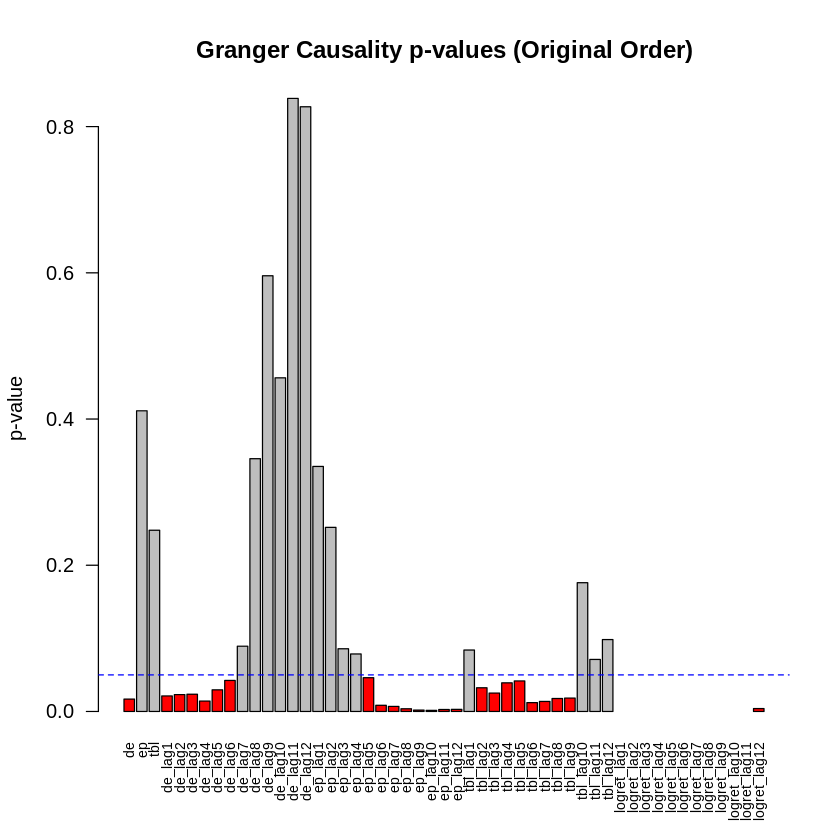

In [ ]:
#Visualisation:

# Convert to a dataframe (no sorting!)
granger_df <- data.frame(
  variable = names(granger_results),
  p_value = as.numeric(granger_results)
)

# Define colors: red if p < 0.05, grey otherwise
granger_df$color <- ifelse(granger_df$p_value < 0.05, "red", "grey")

# Create the barplot keeping your current order
barplot(
  height = granger_df$p_value,
  names.arg = granger_df$variable,
  col = granger_df$color,
  las = 2,  # rotate variable names vertically
  main = "Granger Causality p-values (Original Order)",
  ylab = "p-value",
  cex.names = 0.7
)

# Add horizontal line at 0.05
abline(h = 0.05, col = "blue", lty = 2)


We would keep those with dcor > 0.10 and p < 0.05 in Granger causality

Combined Results:

In [ ]:
# Create a combined dataframe
combined_results <- data.frame(
  variable = names(granger_results),
  granger_p = as.numeric(granger_results),
  dcor_value = as.numeric(dcor_results[names(granger_results)])
)

# Mark which variables pass both criteria
combined_results$selected <- ifelse(
  combined_results$granger_p < 0.05 & combined_results$dcor_value > 0.1,
  "Selected", "Not Selected"
)

print(combined_results)

       variable   granger_p dcor_value     selected
1            de 0.016939288 0.58927150     Selected
2            ep 0.411251244 0.09841258 Not Selected
3           tbl 0.247864828 0.13789919 Not Selected
4       de_lag1 0.021242254 0.58463546     Selected
5       de_lag2 0.023069300 0.58155439     Selected
6       de_lag3 0.023561598 0.57984196     Selected
7       de_lag4 0.014219969 0.57940362     Selected
8       de_lag5 0.029600436 0.57560499     Selected
9       de_lag6 0.042420190 0.56968138     Selected
10      de_lag7 0.089269602 0.56423383 Not Selected
11      de_lag8 0.345776292 0.55849078 Not Selected
12      de_lag9 0.595948889 0.55326857 Not Selected
13     de_lag10 0.456368136 0.54548212 Not Selected
14     de_lag11 0.838566633 0.53449049 Not Selected
15     de_lag12 0.827118438 0.52326160 Not Selected
16      ep_lag1 0.335154881 0.03243683 Not Selected
17      ep_lag2 0.251844332 0.07202633 Not Selected
18      ep_lag3 0.085767277        NaN Not Selected
19      ep_l

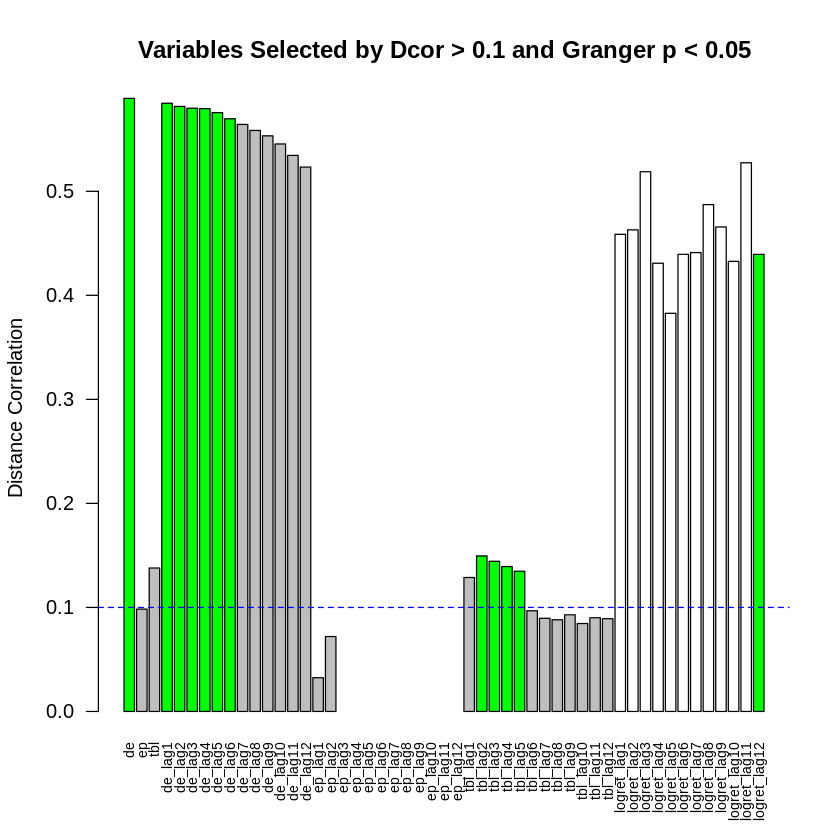

In [ ]:
#Visualisation

# Barplot of distance correlation values, color-coded by selection
barplot(
  height = combined_results$dcor_value,
  names.arg = combined_results$variable,
  col = ifelse(combined_results$selected == "Selected", "green", "grey"),
  las = 2,  # Rotate labels vertically
  main = "Variables Selected by Dcor > 0.1 and Granger p < 0.05",
  ylab = "Distance Correlation",
  cex.names = 0.7
)

# Add reference line for dcor = 0.1
abline(h = 0.1, col = "blue", lty = 2)

In [ ]:
# Select features
selected_vars <- combined_results$variable[
  combined_results$granger_p < 0.05 &
  combined_results$dcor_value > 0.1 &
  !is.na(combined_results$dcor_value) &
  !is.na(combined_results$granger_p)
]

print(selected_vars)

 [1] "de"           "de_lag1"      "de_lag2"      "de_lag3"      "de_lag4"     
 [6] "de_lag5"      "de_lag6"      "tbl_lag2"     "tbl_lag3"     "tbl_lag4"    
[11] "tbl_lag5"     "logret_lag12"


###Neural Network:

In [ ]:
# New train and test
training_selected <- training[, c("logret", selected_vars)]
testing_selected <- testing[, c("logret", selected_vars)]

In [ ]:
# Create the formula dynamically
n <- names(training_selected)
f <- as.formula(paste("logret ~", paste(n[!n %in% "logret"], collapse = " + ")))

In [ ]:
#Fitting random model

# Basic model first: two hidden layers
size = 20  # number of neurons per layer

nnetFitML <- neuralnet(f, data=training_selected,
                       hidden=c(size, size),  # Two hidden layers
                       stepmax = 1e+05, rep=1,
                       err.fct = 'sse',
                       act.fct = 'logistic',  # Logistic activation (you can tune later)
                       linear.output=TRUE)  # TRUE because we are predicting real numbers

In [ ]:
# Predict on test set
pred <- compute(nnetFitML, testing_selected[,-1])  # Remove 'logret' column
prednetML <- pred$net.result

In [ ]:
# Actual values
actualTS <- testing_selected$logret

# Sum of Squared Residuals
ssr <- function(actual, pred){
  sum((actual - pred)^2)
}

# Normalized Root Mean Squared Error
nrmse <- function(actual, pred){
  sqrt(ssr(actual, pred) / ((length(actual) - 1) * var(actual)))
}

# Percentage Correct
pcorrect <- function(actual, pred){
  (1 - nrmse(actual, pred)) * 100
}

# Results
nrmse_value <- nrmse(actualTS, prednetML)
pcorrect_value <- pcorrect(actualTS, prednetML)

cat("NNET Model: NRMSE =", round(nrmse_value,4), ", Pcorrect =", round(pcorrect_value,2), "%\n")


NNET Model: NRMSE = 2.2636 , Pcorrect = -126.36 %


NRMSE > 1 means worse than just predicting the mean every time :( awful modeeeeeeel. help!

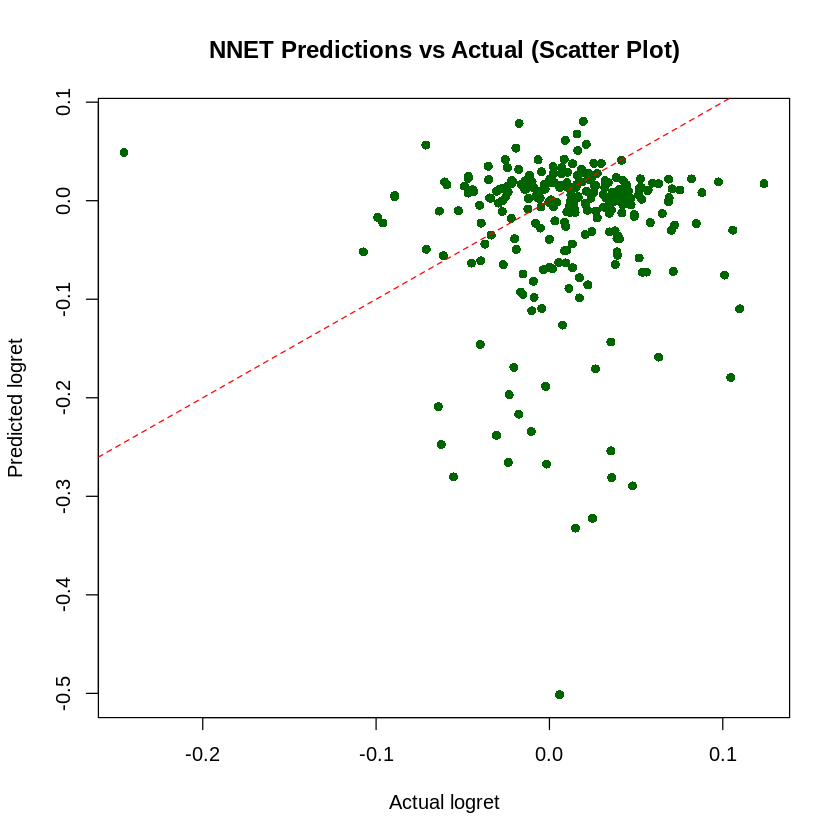

In [ ]:
#Visualisation of Prediction vs Actual Target

plot(as.numeric(actualTS), as.numeric(prednetML),
     xlab = "Actual logret", ylab = "Predicted logret",
     main = "NNET Predictions vs Actual (Scatter Plot)",
     pch = 16, col = "darkgreen")
abline(0,1,col="red",lty=2)

####Tuning:

In [ ]:
# Formula
n <- names(training_selected)
f <- as.formula(paste("logret ~", paste(n[!n %in% "logret"], collapse = " + ")))

# Functions to Evaluate
ssr <- function(actual, pred) sum((actual - pred)^2)
nrmse <- function(actual, pred) sqrt(ssr(actual, pred) / ((length(actual) - 1) * var(actual)))
pcorrect <- function(actual, pred) (1 - nrmse(actual, pred)) * 100

# Create empty list to store results
results <- list()

# Define different architectures
models <- list(
  list(hidden = c(10,10), act = "logistic", name = "Model 1"),
  list(hidden = c(20,20,20), act = "logistic", name = "Model 2"),
  list(hidden = c(5,5), act = "tanh", name = "Model 3"),
  list(hidden = c(5,5), act = "logistic", name = "Model 4")
)

# Loop over models
for (m in models) {

  # Train model
  fit <- neuralnet(f, data=training_selected,
                   hidden = m$hidden,
                   stepmax = 1e+05, rep=1,
                   err.fct = 'sse',
                   act.fct = m$act,
                   linear.output=TRUE)

  # Predict
  pred <- compute(fit, testing_selected[,-1])
  pred_values <- pred$net.result

  # Evaluate
  actualTS <- testing_selected$logret
  nrmse_value <- nrmse(actualTS, pred_values)
  pcorrect_value <- pcorrect(actualTS, pred_values)

  # Store results
  results[[m$name]] <- list(
    nrmse = round(nrmse_value,4),
    pcorrect = round(pcorrect_value,2)
  )

  cat(m$name, ": NRMSE =", round(nrmse_value,4), ", Pcorrect =", round(pcorrect_value,2), "%\n")
}


Model 1 : NRMSE = 7.8188 , Pcorrect = -681.88 %
Model 2 : NRMSE = 3.3483 , Pcorrect = -234.83 %
Model 3 : NRMSE = 5.5452 , Pcorrect = -454.52 %
Model 4 : NRMSE = 1.0534 , Pcorrect = -5.34 %


awful models :( let's try other activation functions

In [ ]:
# Identity activation function (f(x) = x)
identity_act <- function(x) { x }

# ReLU activation function (f(x) = max(0, x))
relu_act <- function(x) { ifelse(x > 0, x, 0) }

# Softplus activation (smooth ReLU: f(x) = log(1+exp(x)))
softplus_act <- function(x) { log(1 + exp(x)) }

# Define activation functions properly
activation_list <- list(
  "identity" = identity_act,
  "logistic" = "logistic",   # native
  "tanh" = "tanh",           # native
  "relu" = relu_act          # custom ReLU
)


this one runs for a lot of time:

In [ ]:
# Define formula
n <- names(training_selected)
f <- as.formula(paste("logret ~", paste(n[!n %in% "logret"], collapse = " + ")))

# Metrics functions
mse <- function(actual, pred) mean((actual - pred)^2)
nrmse <- function(actual, pred) sqrt(mean((actual - pred)^2) / var(actual))

# Activation functions
relu_act <- function(x) ifelse(x > 0, x, 0)

# Correct activation list (no identity)
activation_list <- list(
  "logistic" = "logistic",
  "tanh" = "tanh",
  "relu" = relu_act
)

# Hidden layer configurations
layers <- list(
  "1 layer" = c(10),
  "2 layers" = c(10,10),
  "3 layers" = c(10,10,10),
  "4 layers" = c(10,10,10,10)
)

# Results list
results <- list()

# Training Loop
for (act in names(activation_list)) {
  for (lay_name in names(layers)) {
    lay <- layers[[lay_name]]
    cat("Training:", act, "-", lay_name, "\n")

    fit <- tryCatch(
      neuralnet(f, data=training_selected,
                hidden=lay, stepmax=1e6, rep=1,
                err.fct='sse', act.fct=activation_list[[act]],
                linear.output=TRUE),
      error = function(e) NULL
    )

    if (is.null(fit) ||
        !("result.matrix" %in% names(fit)) ||
        !"convergence" %in% rownames(fit$result.matrix) ||
        fit$result.matrix["convergence", ] == 1) {
      cat("Skipping:", act, "-", lay_name, "(failed or not converged)\n")
      next
    }

    # Predict
    pred <- compute(fit, testing_selected[,-1])$net.result

    # Evaluate
    results[[paste(act, "-", lay_name)]] <- list(
      mse = round(mse(testing_selected$logret, pred), 6),
      nrmse = round(nrmse(testing_selected$logret, pred), 4)
    )
  }
}

# Build results table
results_df <- do.call(rbind, lapply(names(results), function(name) {
  c(Model = name, results[[name]])
}))

# Print final comparison
print(results_df)


###Gaussian Process:

In [ ]:
library(kernlab)

In [ ]:
# Define features and target
x_train <- training_selected[,-1]
y_train <- training_selected$logret

x_test <- testing_selected[,-1]
y_test <- testing_selected$logret

# Kernels to try
kernels <- c("rbfdot", "polydot", "vanilladot", "tanhdot")

# Store results
gp_results <- list()

# Metrics
mse <- function(actual, pred) mean((actual - pred)^2)
nrmse <- function(actual, pred) sqrt(mean((actual - pred)^2) / var(actual))

# Loop over kernels
for (ker in kernels) {
  cat("Training GP with Kernel:", ker, "\n")

  gp_model <- gausspr(x = as.matrix(x_train), y = y_train, kernel = ker)

  # Predict
  y_pred <- predict(gp_model, as.matrix(x_test))

  # Evaluate
  gp_results[[ker]] <- list(
    mse = round(mse(y_test, y_pred), 6),
    nrmse = round(nrmse(y_test, y_pred), 4)
  )
}

# Results table
gp_results_df <- do.call(rbind, lapply(names(gp_results), function(name) {
  c(Kernel = name, gp_results[[name]])
}))

# Print results
print(gp_results_df)


Training GP with Kernel: rbfdot 
Using automatic sigma estimation (sigest) for RBF or laplace kernel 
Training GP with Kernel: polydot 
 Setting default kernel parameters  
Training GP with Kernel: vanilladot 
 Setting default kernel parameters  
Training GP with Kernel: tanhdot 
 Setting default kernel parameters  
     Kernel       mse      nrmse 
[1,] "rbfdot"     0.002145 1.1041
[2,] "polydot"    0.002043 1.0775
[3,] "vanilladot" 0.002043 1.0775
[4,] "tanhdot"    0.116036 8.1204


###LSTM:

In [ ]:
install.packages("reticulate")
library(reticulate)
install_python(version = "3.10.11")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Installing pyenv ...
Done! pyenv has been installed to '/root/.local/share/r-reticulate/pyenv/bin/pyenv'.


+ /root/.local/share/r-reticulate/pyenv/bin/pyenv update

+ /root/.local/share/r-reticulate/pyenv/bin/pyenv install --skip-existing 3.10.11



ERROR: Error: installation of Python 3.10.11 failed


In [ ]:
library(keras)
install_keras()

ERROR: Error in stop_no_virtualenv_starter(version = version, python = python): Suitable Python installation for creating a venv not found.
  Requested Python: /usr/bin/python3.10
  Requested version constraint: 3.10
Please install Python with one of following methods:
- https://github.com/rstudio/python-builds/
- reticulate::install_python(version = '<version>')
- sudo apt install python3-venv python3-pip python3-dev


In [ ]:
# Standardize predictors
means <- apply(training_selected[,-1], 2, mean)
sds <- apply(training_selected[,-1], 2, sd)

x_train <- scale(training_selected[,-1], center=means, scale=sds)
x_test <- scale(testing_selected[,-1], center=means, scale=sds)

y_train <- training_selected$logret
y_test <- testing_selected$logret


In [ ]:
#model:

means <- apply(training_selected[,-1], 2, mean)
sds <- apply(training_selected[,-1], 2, sd)

x_train <- scale(training_selected[,-1], center=means, scale=sds)
x_test <- scale(testing_selected[,-1], center=means, scale=sds)

y_train <- training_selected$logret
y_test <- testing_selected$logret

# Set timesteps
timesteps <- 3

reshape_lstm_data <- function(x, y, timesteps) {
  n_samples <- nrow(x) - timesteps
  x_out <- array(NA, dim=c(n_samples, timesteps, ncol(x)))
  y_out <- y[(timesteps+1):length(y)]

  for (i in 1:n_samples) {
    x_out[i,,] <- x[i:(i+timesteps-1),]
  }

  list(x = x_out, y = y_out)
}

train_data <- reshape_lstm_data(x_train, y_train, timesteps)
test_data <- reshape_lstm_data(x_test, y_test, timesteps)

# Build LSTM Model
model <- keras_model_sequential() %>%
  layer_lstm(units = 20, input_shape = c(timesteps, ncol(x_train))) %>%
  layer_dense(units = 1)

# Compile model
model %>% compile(
  optimizer = "adam",
  loss = "mse"
)

# Train model
history <- model %>% fit(
  x = train_data$x,
  y = train_data$y,
  epochs = 100,
  batch_size = 32,
  validation_split = 0.2,
  verbose = 2
)

# Predict
pred_lstm <- model %>% predict(test_data$x)

# Evaluation
mse_lstm <- mean((pred_lstm - test_data$y)^2)
nrmse_lstm <- sqrt(mse_lstm / var(test_data$y))

cat("LSTM Model:\n")
cat("MSE =", round(mse_lstm, 6), "\n")
cat("NRMSE =", round(nrmse_lstm, 4), "\n")


ERROR: Error: Valid installation of TensorFlow not found.

Python environments searched for 'tensorflow' package:
 /root/.local/share/uv/python/cpython-3.11.11-linux-x86_64-gnu/bin/python3.11

Python exception encountered:
 Traceback (most recent call last):
  File "/usr/local/lib/R/site-library/reticulate/python/rpytools/loader.py", line 122, in _find_and_load_hook
    return _run_hook(name, _hook)
           ^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/R/site-library/reticulate/python/rpytools/loader.py", line 96, in _run_hook
    module = hook()
             ^^^^^^
  File "/usr/local/lib/R/site-library/reticulate/python/rpytools/loader.py", line 120, in _hook
    return _find_and_load(name, import_)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ModuleNotFoundError: No module named 'tensorflow'


You can install TensorFlow using the install_tensorflow() function.

